In [1]:
# Try to Get the images ==> Feeding Keras with our own dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import PIL
import os
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils

In [76]:
current_path = os.getcwd()
root_folders = os.listdir(current_path + "\\images2")
import cv2

In [77]:
root_folders

['class1',
 'class1_resized',
 'class2',
 'class2_resized',
 'class3',
 'class3_resized',
 'class4',
 'class4_resized',
 'class5',
 'class5_resized',
 'class6',
 'class6_resized',
 'class7',
 'class7_resized',
 'class8',
 'class8_resized',
 'class9',
 'class9_resized']

In [78]:
images_files = root_folders
images_samples = len(images_files)
print(images_samples)
img_width = 256
img_height = 256

18


In [80]:
for folder_name in images_files:
#     os.mkdir(current_path + "\\images2\\" + folder_name + "_resized")
    imagesin_file = os.listdir(current_path + "\\images2\\" + folder_name)
    if folder_name.find("_resized") == -1:
        for file in imagesin_file:    
            im = Image.open(current_path + "\\images2\\" + folder_name +  "\\" + file)
            img = im.resize((img_width , img_height))
            gray = img.convert('L')
            gray.save(current_path + "\\images2\\" + folder_name + "_resized" + "\\" + file , "PNG")

In [81]:
# Get the Resized & Gray Scale Images
# images_resized = os.listdir(current_path + );
# img_1 = np.array(Image.open(path2 + "\\" + images_resized[0])) # to get the Size of the Images
# m , n = img_1.shape[0:2]
# images_numbers = len(images_resized)

In [86]:
# Flatten the Images to store in Matrix
count = 0
for folder_name in images_files:
    if folder_name.find("_resized") != -1:
        imagesin_file = os.listdir(current_path + "\\images2\\" + folder_name)
        if count == 0:
            images_matrix = np.array([
                np.array(Image.open(current_path + "\\images2\\" + folder_name  + "\\" + file)).flatten() for file in imagesin_file
            ],'f')
            count = count + 1
        else:
            images_matrix = np.append(images_matrix ,np.array([np.array(Image.open(current_path + "\\images2\\" + folder_name  + "\\" + file)).flatten() for file in imagesin_file], 'f'), axis=0) 

In [87]:
images_matrix.shape

(4500, 65536)

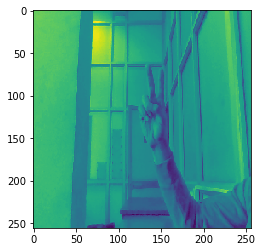

In [88]:
%matplotlib inline
images_samples = images_matrix.shape[0]
labels = np.ones((images_samples,),dtype= int)
count = 500
start = 0
for counter in range(10):
    labels[start:count] = counter
    start = count
    count = count + 500

    
# labels[9999]
# labels = np.ones((images_samples,))
# image_sample = images_matrix[1502].reshape(img_width , img_height)
# plt.imshow(image_sample)

image_sample = images_matrix[1500].reshape(img_width , img_height)
plt.imshow(image_sample)

In [89]:
labels

array([0, 0, 0, ..., 8, 8, 8])

In [90]:
images_matrix.shape

(4500, 65536)

In [91]:
data , label = shuffle(images_matrix , labels ,random_state = 2)

In [92]:
train_data = [data , label]
%matplotlib inline

In [93]:
# Make the Train and Test Dataset
(X ,Y) = (train_data[0] , train_data[1])


X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=4)


X_train = X_train.reshape(-1 ,img_width ,img_height , 1)
X_test = X_test.reshape(-1, img_width , img_height, 1)

In [94]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
nb_classes = 9 # For the Softmax fo the 10 Gesture but I use now just 1 class
# Convert vectors to matrices
Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)
# X_train.shape

X_train Shape :  (3600, 256, 256, 1)
X_test Shape :  (900, 256, 256, 1)
Y_train Shape :  (3600, 9)
Y_test Shape :  (900, 9)


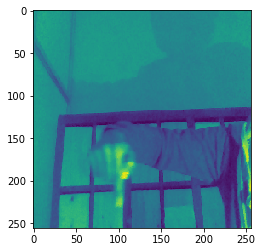

In [95]:
plt.imshow(X_train[555 , : , : , 0] , interpolation='nearest')

# Size of train and test matrices
print("X_train Shape : ",X_train.shape)
print("X_test Shape : " , X_test.shape)
print("Y_train Shape : " , Y_train.shape)
print("Y_test Shape : " , Y_test.shape)

In [99]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.layers import Flatten, Activation
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Conv2D
import keras.backend as K
from keras.optimizers import Adam

K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
activation_1 (Activation)    (None, 127, 127, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 516128)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               66064512  
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 585       
Total para

In [101]:
model.fit(X_train,Y_train, batch_size=128,
          epochs=4, verbose=1, validation_split=0.3)

Train on 2520 samples, validate on 1080 samples
Epoch 1/4
2520/2520 [==============================] - 187s 74ms/step - loss: 2.0796 - acc: 0.2587 - val_loss: 1.6717 - val_acc: 0.2898
Epoch 2/4
2520/2520 [==============================] - 146s 58ms/step - loss: 1.2501 - acc: 0.7135 - val_loss: 0.9025 - val_acc: 0.8056
Epoch 3/4
2520/2520 [==============================] - 136s 54ms/step - loss: 0.6067 - acc: 0.9377 - val_loss: 0.3857 - val_acc: 0.9778
Epoch 4/4
2520/2520 [==============================] - 142s 56ms/step - loss: 0.2656 - acc: 0.9909 - val_loss: 0.1914 - val_acc: 0.9750


In [102]:
model.evaluate(X_test, Y_test)

900/900 [==============================] - 13s 15ms/step


[0.18459241767724355, 0.97333333333333338]

In [114]:
from keras.preprocessing import image
im2 = Image.open('E:\\Python\\Deep Learning\\Tensorflow-Bootcamp-master\\Gesture Reco. Project\\images2\\class9\\200.png')
img2 = im2.resize((img_width , img_height))
gray2 = img2.convert('L')
#             gray.save(current_path + "\\images\\" + folder_name + "_resized" + "\\" + file , "PNG")

images_matrix2 = np.array(gray2).flatten()


images_matrix2 = images_matrix2.reshape(-1 , img_width , img_height , 1)

images_matrix2.shape
classes = model.predict_classes(images_matrix2, batch_size=10)
print(classes)



[8]


In [115]:
model.save('model2.h5')